# 一、前缀和
**定义:**
> 记录数组中前i个元素的和的辅助数组。

## （一）一维前缀和

### 例题1：前缀和

**题目描述：**
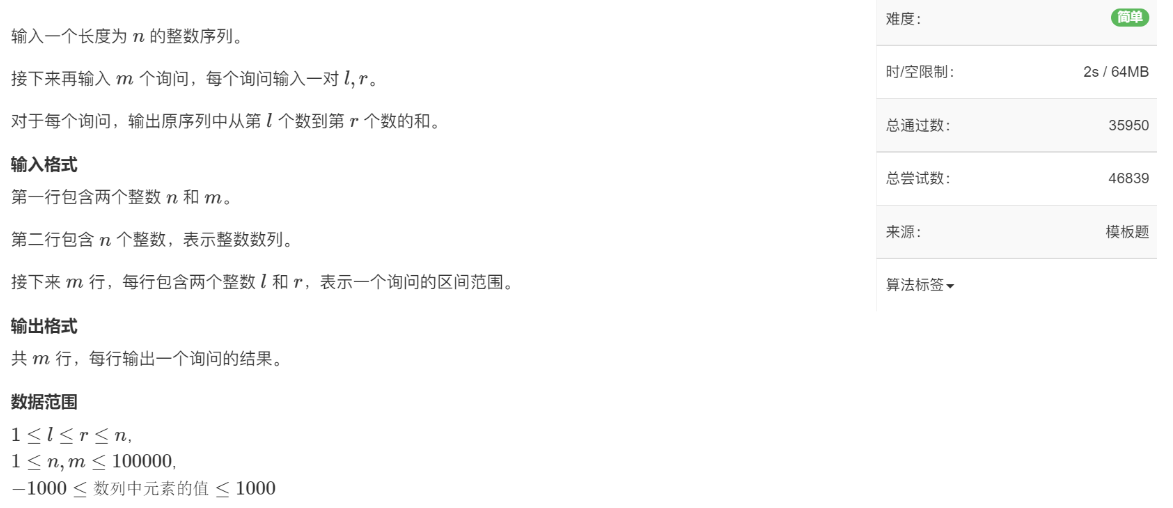

In [ ]:
n,m = map(int,input().split())
nums = [int(i) for i in input().split()]
# 创建前缀和数组
prefix = nums.copy()
prefix = [0]+prefix
for i in range(1,n):
    prefix[i] += prefix[i-1]
# 接收m组询问
for i in range(m):
    l,r = map(int,input().split())
    print(prefix[r] - prefix[l-1])

### 例题2 灵能传输
> 题目链接：[灵能传输（蓝桥杯）](https://blog.csdn.net/qq_53060585/article/details/123562548)

**解题思路:**
> 对三个相邻的数 $a_{i-1},a_i,a_{i+1}$，无论 $a_i < 0$ 还是 $a_i > 0$ 都可以进行操作将其变为 $a_{i-1}+a_i,-a_i,a_{i+1}+a_i$，注意到修改操作不会改变除这三个元素的序号以外的前缀和数组，而对前缀和数组来说，这个操作相当于互换了 $b_{i-1}$ 和 $b_i$ 的值。

In [ ]:
t = int(input())
for _ in range(t):
    n = int(input())
    a = [int(i) for i in input().split()]
    # 计算a列表的前缀和
    for i in range(1,n):
        a[i] = a[i] + a[i-1]
    # 因为规定，开头结尾的两个元素不能移动，所以排序后需要继续处理
    begin,end = a[0],a[n-1]
    if begin > end:
        temp = begin
        begin = end
        end = temp
    a.sort()
    # begin 应当尽可能靠近单调部分的起始位置（极小值点）
    # 找出两个端点在排序后列表中的下标
    begin = b.index(begin)
    end = b.index(end)
    st = [False]*n # 记录元素是否被确定
    # b[]记录了调整操作后的最终状态
    b = [0 for i in range(n)]
    l = 0
    r = n-1
    # 从begin开始向min，步长为2
    for i in range(begin, -1, -2):
        b[l] = a[i]
        l += 1
        st[i] = True
    # 从end开始向max，步长为2
    for i in range(end,n,2):
        b[r] = a[i]
        r -= 1
        st[i] = True
    # 补全剩余节点，相当于中间的单调区间
    for i in range(0,n):
        if st[i]:
            continue
        b[l] = a[i]
        l += 1
        st[i] = True
    ans = 0
    for i in range(1,n):
        temp = abs(b[i] - b[i-1])
        if temp > ans:
            ans = temp
    print(ans)

## （二）二维前缀和

### 例题：子矩阵的和

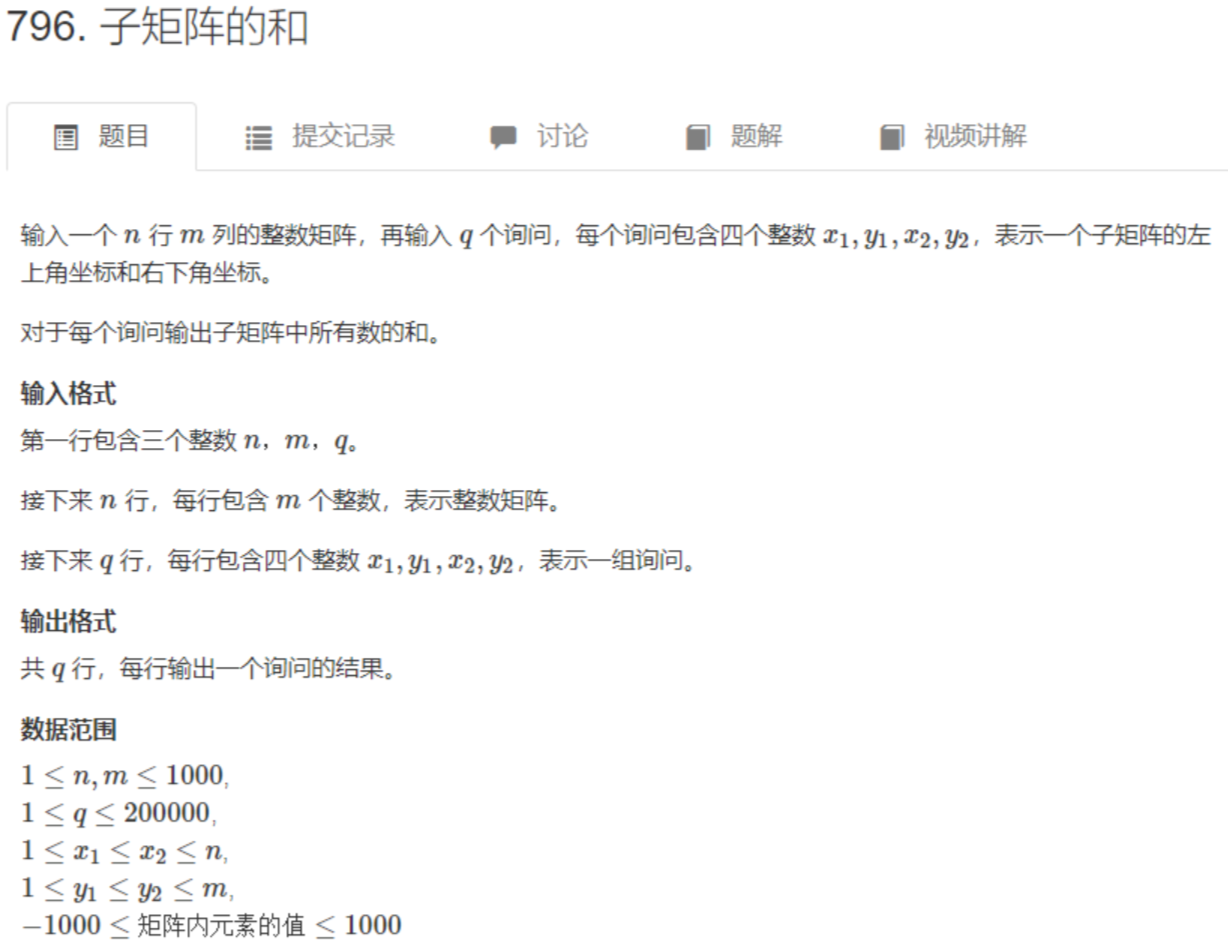

In [ ]:
n,m,q = map(int,input().split())
a = [[0 for i in range(m+1)]]
for i in range(n):
    a.append([0] + [int(j) for j in input().split()])
# 计算出前缀和数组
for i in range(1, n+1):
    for j in range(1, m+1):
        a[i][j] += a[i-1][j] + a[i][j-1] - a[i-1][j-1]
for _ in range(q):
    x1,y1,x2,y2 = map(int,input().split())
    # 注意到所给坐标从1开始
    print(a[x2][y2]-a[x2][y1-1]-a[x1-1][y2]+a[x1-1][y1-1])

# 二、差分数组
**定义：**
> 记录数组中相邻节点变化值的辅助数组。

**创建方法：**
> 对长度为n的数组a，创建一个长度为n+1的数组d作为差分数组，其中：\
a[i] = d[1] + d[2] + ... + d[i]\
a[0] = d[0]\
d[n] = x(任意值)

**修改方法：**
> 要让a列表区间[i,j]中所有元素加上常数c，常规操作是遍历a数组区间内所有元素，时间复杂度为线性。对于差分数组，只需要让d[i]+c，d[j]-c即可，时间复杂度降为常数

**应用分析：**
> 差分数组让区间修改的时间复杂度从线性降为常数，但单点查询的时间复杂度却因为需要进行累加操作从常数升为线性。所以差分算法适用于需要多次修改区间值但只需要查询一次的情景。如果的确需要多次查询，可以建立线段树或树状数组将查询操作的时间复杂度从 $O(n)$ 降为 $O(logn)$

### 例题1：最高的牛
> 题目链接：[Acwing 101. 最高的牛](https://www.acwing.com/problem/content/description/103/)

**题目描述：**
> 有 N 头牛站成一行，被编队为 1、2、3…N，每头牛的身高都为整数。当且仅当两头牛中间的牛身高都比它们矮时，两头牛方可看到对方。现在，我们只知道其中最高的牛是第 P 头，它的身高是 H ，剩余牛的身高未知。但是，我们还知道这群牛之中存在着 M 对关系，每对关系都指明了某两头牛 A 和 B 可以相互看见。求每头牛的身高的最大可能值是多少。

**输入:**
> 第一行输入整数 N,P,H,M
，数据用空格隔开。接下来 M 行，每行输出两个整数 A 和 B，代表牛 A 和牛 B 可以相互看见，数据用空格隔开。

**输出:**
> 一共输出 N 行数据，每行输出一个整数。第 i 行输出的整数代表第 i 头牛可能的最大身高。

**数据规模：**
>1≤N≤5000,\
1≤H≤1000000,\
1≤A,B≤10000,\
0≤M≤10000

In [ ]:
# 设置一个差分数组d，d[i]其中记录从左边到i的区间内元素的变化
n,p,h,m = map(int,input().split())
d = [0]*(n+1)
visited = [[False]*(n+1) for i in range(n+1)]

for i in range(m):
    a,b = map(int,input().split())
    if a > b:
        left = b
        right = a
    else:
        left = a
        right = b
    if visited[left][right] == True:
        continue
    else:
        visited[left][right] = True
    # 区间 [a+1:b-1]内所有元素减一
    if right - left > 1:
        d[right-1] -= 1
        d[left] += 1

for i in range(1,n+1):
    # 计算第i头牛的最大身高
    high = h
    for j in range(i,n+1):
        high += d[j]
    print(high)

### 例题2：IncDec Sequence
> 题目链接：[IncDec Sequence（洛谷）](https://www.luogu.com.cn/problem/P4552)

**题目描述：**
> 给定一个长度为 $n$ 的数列 ${a_1,a_2,\cdots,a_n}$，每次可以选择一个区间$[l,r]$，使这个区间内的数都加 $1$ 或者都减 $1$。 
请问至少需要多少次操作才能使数列中的所有数都一样，并求出在保证最少次数的前提下，最终得到的数列有多少种。

**输入格式：**
>第一行一个正整数 $n$   
接下来 $n$ 行,每行一个整数,第 $i+1 $行的整数表示 $a_i$。

**输出格式：**
> 第一行输出最少操作次数   
第二行输出最终能得到多少种结果

**提示：**
> 对于 $100\%$ 的数据，$n\le 100000, 0 \le a_i \le 2^{31}$。

In [ ]:
n = int(input())
a = [0]*n
for i in range(n):
    a[i] = int(input())
# 构建差分数组
d = [0]*(n+1)
# 首节点特殊处理
d[0] = a[0]
for i in range(1,n):
    d[i] = a[i] - a[i-1]
# 即要将除d[0],d[n]以外d列表中所有元素全部置为0
# 对d列表的修改规则是每一次选择两个列表元素，对值为正数的列表元素减一，值为负数的列表元素加一
# 随后如果仅存在正数或负数，则选择d[0]或d[n]与之配对，其中修改d[0]会改变原列表的值，修改d[n]不会，所以会产生不同的列表
mid = 0
process = 0
for i in range(1,n):
    mid += d[i]
    process += abs(d[i])
process = (process-mid)//2 + mid
print(process, mid+1)

## （一）差分矩阵

### 例题 1：差分矩阵
> 题目链接：[差分矩阵](https://blog.csdn.net/AC__dream/article/details/122736353)

**题目描述：**
> 输入一个 n 行 m 列的整数矩阵，再输入 q 个操作，每个操作包含五个整数 x1,y1,x2,y2,c，其中 (x1,y1) 和 (x2,y2) 表示一个子矩阵的左上角坐标和右下角坐标。每个操作都要将选中的子矩阵中的每个元素的值加上 c。请你将进行完所有操作后的矩阵输出。

**输入格式：**
>第一行包含整数 n,m,q。接下来 n 行，每行包含 m 个整数，表示整数矩阵。接下来 q 行，每行包含 5 个整数 x1,y1,x2,y2,c，表示一个操作。

**输出格式：**
> 共 n 行，每行 m 个整数，表示所有操作进行完毕后的最终矩阵。

**提示：**
> 1≤n,m≤1000,
1≤q≤100000,
1≤x1≤x2≤n,
1≤y1≤y2≤m,
−1000≤c≤1000,
−1000≤矩阵内元素的值≤1000

In [ ]:
# 差分矩阵的设计类似于集合中的包容排斥定理，d[i][j]作用于 a[i][j] 右下角子矩阵的所有元素
n,m,q = map(int,input().split())
# 建立差分矩阵
d = [[0]*1003 for i in range(1003)]
# 相当于对n*m个1*1大小的子矩阵进行修改
for i in range(1,n+1):
    line = [int(k) for k in input().split()]
    for j in range(1,m+1):
        # c = line[j]
        d[i][j] += line[j-1]
        d[i+1][j+1] += line[j-1]
        d[i+1][j] -= line[j-1]
        d[i][j+1] -= line[j-1]

for i in range(n+1):
    for j in range(m+1):
        print(d[i][j],end = ' ')
    print()

# 进行修改操作
for _ in range(q):
    x1,y1,x2,y2,c = map(int,input().split())
    d[x1][y1] += c
    d[x2+1][y2+1] += c
    d[x2+1][y1] -= c
    d[x1][y2+1] -= c
# 利用差分矩阵计算新矩阵
for i in range(1,n+1):
    for j in range(1,m+1):
        d[i][j] += d[i-1][j] + d[i][j-1] - d[i-1][j-1]
for i in range(1,n+1):
    for j in range(1,m+1):
        print(d[i][j],end = ' ')
    print()

### 例题 2：棋盘
> 题目链接：[棋盘（蓝桥杯）](https://www.lanqiao.cn/problems/3533/learning/?page=1&first_category_id=1&second_category_id=3&tags=%E5%89%8D%E7%BC%80%E5%92%8C)

In [ ]:
# 差分
# 偶数表示棋子是白色，奇数表示棋子是黑色
# 初始值为0
n,m = map(int,input().split())
# 建立差分数组
d = [[0 for i in range(n+2)] for j in range(n+2)]
for _ in range(m):
    x1,y1,x2,y2 = map(int,input().split())
    # 注意坐标从1开始，所以不需要减一
    d[x1][y1] += 1
    d[x1][y2+1] -= 1
    d[x2+1][y1] -= 1
    d[x2+1][y2+1] += 1
# 计算出结果数组
a = [[0 for i in range(n+1)] for j in range(n+1)]
for i in range(1, n+1):
    for j in range(1,n+1):
        a[i][j] = a[i-1][j] + a[i][j-1] - a[i-1][j-1] + d[i][j]
# print answer
for i in range(1, n+1):
    for j in range(1,n+1):
        print((a[i][j])%2,end = '')
    print()

## （二）三维差分列表
> 思路分析：在二维差分中，前缀和数组a[i][j]是差分数组中的 d[][] 以(1,1)为左上角，(i,j)为右下角的矩形中所有元素的和。同理，在三维差分中a[i][j][k]等于差分数组d中(1,1,1)到(i,j,k)的立方体中所有元素的和。

### 例题一：三体攻击
> 题目链接：[三体攻击（蓝桥杯）](https://www.acwing.com/problem/content/description/1234/)

**题目描述：**
> 三体人将对地球发起攻击。为了抵御攻击，地球人派出了 A×B×C 艘战舰，在太空中排成一个 A 层 B 行 C 列的立方体。
其中，第 i 层第 j 行第 k 列的战舰（记为战舰 (i,j,k)）的生命值为 d(i,j,k)。三体人将会对地球发起 m 轮“立方体攻击”，每次攻击会对一个小立方体中的所有战舰都造成相同的伤害。具体地，第 t 轮攻击用 7 个参数 lat,rat,lbt,rbt,lct,rct,ht描述；\
所有满足 i∈[lat,rat],j∈[lbt,rbt],k∈[lct,rct] 的战舰 (i,j,k) 会受到 ht 的伤害。\
如果一个战舰累计受到的总伤害超过其防御力，那么这个战舰会爆炸。\
地球指挥官希望你能告诉他，第一艘爆炸的战舰是在哪一轮攻击后爆炸的。

**输入描述：**
> 第一行包括 4 个正整数 A,B,C,m；第二行包含 A×B×C 个整数，其中第 ((i−1)×B+(j−1))×C+(k−1)+1 个数为 d(i, j, k)；\
第 3 到第 m+2 行中，第 (t − 2) 行包含 7 个正整数 lat, rat, lbt, rbt, lct, rct, ht。

**输出格式：**
> 输出第一个爆炸的战舰是在哪一轮攻击后爆炸的。保证一定存在这样的战舰。

In [ ]:
# 二分法+三维差分
# 注意到本题需要进行多次单点查询操作，而战舰是否爆炸符合二分特性，为了提升代码性能，使用二分法搜索该节点
# 后续尝试引入线段树
a,b,c,m = map(int,input().split())
nums = [0] + [int(i) for i in input().split()] # 战舰防御总值
ops = [list(map(int,input().split())) for i in range(m)] # 指令集

# 找出收到mid次攻击以后舰队的差分列表
# 遍历后判断是否存在战舰被击败
def modify(t):
    global nums,ops
    d = [[[0 for i in range(a+2)] for j in range(c+2)] for k in range(b+2)]
    for i in range(t):
        lc,rc,la,ra,lb,rb,h = ops[i][0],ops[i][1],ops[i][2],ops[i][3],ops[i][4],ops[i][5],ops[i][6]
        d[la][lb][lc] += h
        d[ra+1][lb][lc] -= h
        d[la][rb+1][lc] -= h
        d[la][lb][rc+1] -= h
        d[ra+1][rb+1][lc] += h
        d[ra+1][lb][rc+1] += h
        d[la][rb+1][rc+1] += h
        d[ra+1][rb+1][rc+1] -= h
    # 检查修改t次后是否存在受伤总值超过防御值的战舰
    for i in range(1,b+1):
        for j in range(1,c+1):
            for k in range(1,a+1):
                d[i][j][k] += d[i-1][j][k]+d[i][j-1][k]+d[i][j][k-1]-d[i-1][j-1][k]-d[i-1][j][k-1]-d[i][j-1][k-1]+d[i-1][j-1][k-1]
                if d[i][j][k] > nums[((k-1)*b+(i-1))*c+j]:
                    return True
    return False
def binarySearch():
    left = 0
    right = m-1
    while left < right:
        mid = (left+right)//2
        res = modify(mid)
        if res:
            right = mid
        else:
            left = mid+1
    return left
print(binarySearch())